In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix,f1_score
import matplotlib.pyplot as plt
from sklearn import linear_model
#from sklearn.metrics import classification_report,accuracy_score  
import numpy as np
#from sklearn.ensemble import RandomForestClassifier
import warnings
import collections
#from sklearn.metrics import roc_curve, auc
#from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.model_selection import cross_val_score#k折交叉验证

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE,SVMSMOTE,RandomOverSampler


warnings.filterwarnings("ignore")
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
df=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\data.xlsx')#构建模型的数据

#df1=pd.read_excel(r'C:\Users\82383\Desktop\郑嘉欣_毕业论文相关资料\评价实验数据.xlsx')#评价试验的数据

In [2]:
#绘制真实值与预测值之间的散点图
def scatter_plot(TureValues,PredictValues,R2):
    #设置参考的1：1虚线参数
    xxx = [-0.5,90]
    yyy = [-0.5,90]
    #绘图
    plt.figure()
    plt.plot(xxx , yyy , c='0' , linewidth=1 , linestyle=':' , marker='.' , alpha=0.3 , label=' R2=%.3f'%R2)#绘制虚线
    plt.scatter(TureValues , PredictValues , s=20 , c='r' , edgecolors='k' , marker='o' , alpha=0.8)#绘制散点图，横轴是真实值，竖轴是预测值
    plt.xlim((0,90))   #设置坐标轴范围
    plt.ylim((0,90))
    #plt.title('MLP model R2:%.3f'%R2)
    plt.xlabel('Actual POI Salience') # x 轴
    plt.ylabel('Predicted POI Salience') # y轴
    plt.show()  

['No' 'POI Name' 'Salience' 'Popu' 'Name' 'Funt' 'Loct1' 'Loct2' 'Loct3'
 'Loct4' 'Loct5' 'Size1' 'Size2' 'Size3' 'Deco' 'Type']
[['A1' 'Zippo' 12.32 ... 0 0 2]
 ['A2' 'Zhouheiya' 22.46 ... 0 0 0]
 ['A3' 'Yidiandian' 46.38 ... 0 0 1]
 ...
 ['C5' 'Adidas ' 35.9 ... 0 0 0]
 ['A41' 'Adidas' 89.13 ... 0 0 1]
 ['C17' '361 ° ' 15.38 ... 0 0 2]]


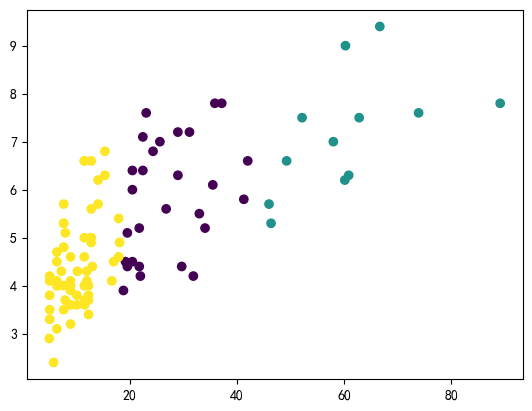

In [5]:
#采用K-means对数据进行分类处理
data_class=np.array(df.drop(['No','POI Name'],axis=1))
KM_class=KMeans(n_clusters=3,random_state=9).fit_predict(data_class)
KM_class=KM_class[:,np.newaxis]
index=['Type']
columns=np.concatenate([df.columns,index],axis=0)
print(columns)
#print(KM_class.shape)
merge_data=np.concatenate([df,KM_class],axis=1)
print(merge_data)
plt.scatter(data_class[:,0],data_class[:,1],c=KM_class)
data=pd.DataFrame(merge_data,columns=columns)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\Class_Data.xlsx',sheet_name='分类',index=False)  #存储下列表

In [6]:
#采用不同方法对不平衡数据进行处理
df_Oversampling =pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\Class_Data.xlsx')#构建模型的数据
x_sampling=df_Oversampling.drop(['No','POI Name','Type'],axis=1)
y_sampling=df_Oversampling['Type']
x_train, x_test_All ,y_train, y_test_Type= train_test_split(x_sampling, y_sampling,test_size=0.2,  random_state=55)

columns1=columns[2:15]

data=pd.DataFrame(x_test_All,columns=columns1)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TestData_20.xlsx',sheet_name='抽取20%',index=False)  #存储测试数据集

data=pd.DataFrame(x_train,columns=columns1)


data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_80.xlsx',sheet_name='抽取80%',index=False)  #存储下列表

#SMOTE上采样
sm=SMOTE(random_state=42)
x_train_resample,y_train_resample=sm.fit_resample(x_train,y_train)

data=pd.DataFrame(x_train_resample,columns=columns1)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_SMOTE.xlsx',sheet_name='过采样',index=False)  #存储下列表

#ADASYN上采用
ad=ADASYN(random_state=42)
x_train_resample,y_train_resample=ad.fit_resample(x_train,y_train)

data=pd.DataFrame(x_train_resample,columns=columns1)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_ADASYN.xlsx',sheet_name='过采样',index=False)  #存储下列表

#随机上采用
x_train_resample,y_train_resample=RandomOverSampler(random_state=42).fit_resample(x_train,y_train)

data=pd.DataFrame(x_train_resample,columns=columns1)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_Random.xlsx',sheet_name='过采样',index=False)  #存储下列表
#print(data)


In [3]:
#对过采样后的数据进行训练
df_test=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TestData_20.xlsx')#读取测试数据
df=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_SMOTE.xlsx')#读取采用SMOTE采样的训练数据
#df=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_ADASYN.xlsx')#读取采用ADASYN采样的训练数据
#df=pd.read_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TrainData_Random.xlsx')#读取采用Random采样的训练数据

x_train=df.drop(['Salience'],axis=1)
y_train=df['Salience']
x_test=df_test.drop(['Salience'],axis=1)
y_test=df_test['Salience']

""" s=StandardScaler() #后续将标准化后的数据显示出来
x_train=s.fit_transform(x_train)
print(x_train) """

print(x_test)
#数据标准化(指标popu标准化)  
tr_popu=x_train.iloc[:,0]     
te_popu=x_test.iloc[:,0]
mean=np.mean(pd.concat([tr_popu,te_popu]),axis=0)
std=np.std(pd.concat([tr_popu,te_popu]),axis=0)
x_train.iloc[:,0]-= mean
x_train.iloc[:,0]/= std
x_test.iloc[:,0]-= mean
x_test.iloc[:,0]/= std

print(x_test)
#x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)
#print(y_test)

    Popu  Name  Funt  Loct1  Loct2  Loct3  Loct4  Loct5  Size1  Size2  Size3  \
0    5.7     0     0      0      0      1      0      0      1      0      0   
1    7.2     0     0      1      0      0      0      0      1      0      0   
2    7.8     0     0      0      0      0      0      1      0      1      0   
3    7.5     0     0      1      0      0      0      0      0      1      0   
4    6.4     0     0      1      0      0      0      0      0      1      0   
5    3.6     0     0      0      0      1      0      0      1      0      0   
6    6.6     0     0      1      0      0      0      0      1      0      0   
7    4.0     0     0      0      1      0      0      0      1      0      0   
8    4.5     1     0      0      0      0      1      0      0      0      1   
9    4.8     1     0      0      0      1      0      0      0      1      0   
10   4.2     0     0      0      0      0      0      1      0      0      1   
11   4.0     0     0      0      0      

20.159063489771228


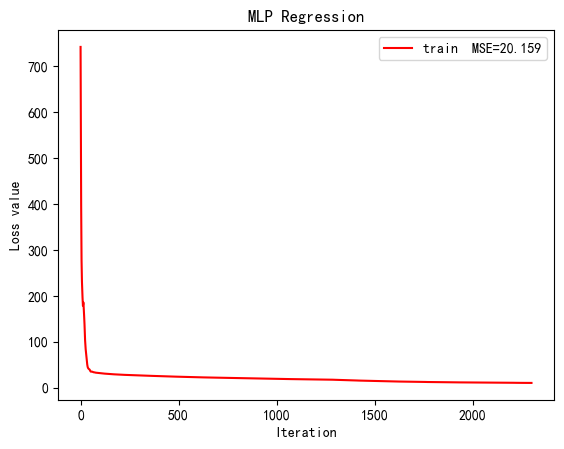

In [6]:
#按照默认值初步进行训练
activations=['tanh']
solver=['adam']
learningrate=[0.01]
hidden_layer_sizes=[(200,200)]
epochs=2300
data=[]

MLP_estimator=MLPRegressor(activation=activations[0],
                         solver=solver[0],hidden_layer_sizes=hidden_layer_sizes[0],
                         learning_rate_init=learningrate[0], max_iter =epochs,random_state=55)


MLP_estimator.fit(x_train,y_train)
y_pred=MLP_estimator.predict(x_train)
train_mse=mean_squared_error(y_train,y_pred) #获得训练集的MSE
print(train_mse)

data=list(zip(*np.array([y_train,y_pred])))
#print(data)

plt.figure(1)
plt.plot(MLP_estimator.loss_curve_,'r',label='train  MSE=%.3f'%train_mse)

#MLP_estimator.fit(x_,y_valid)
# y_pred=MLP_estimator.predict(x_test)
# test_mse=mean_squared_error(y_test,y_pred)
# print(test_mse)
# pred_j =MLP_estimator.predict(x_test)
# #print(pred_j)
# print(r2_score(y_test,pred_j)) 
# mae1 = mean_absolute_error(pred_j, y_test)
# mse1 = mean_squared_error(pred_j, y_test)

# MLP_estimator.fit(x_test,y_test)
# plt.plot(MLP_estimator.loss_curve_,'g',label='test')
plt.legend()
plt.title('MLP Regression')
plt.xlabel('Iteration') # x 轴
plt.ylabel('Loss value') # y轴

data=pd.DataFrame(data)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\Predict_Train.xlsx',sheet_name='训练数据集')  #存储下列表




In [30]:
#采用网格搜索法确定最优参数
activations=['logistic','tanh']
solver=['adam','sgd','lbfgs']
learningrate=[0.01,0.001,0.0001]
hidden_layer_sizes=[(50,50),(100,100),(200,200),(300,300),(400,400),(500,500)]
epochs=5000

dict1={'max_iters':[],'activations':[],'solver':[],'learningrate':[],'hidden_layer_sizes':[]}
data=[]
for i in activations:
    for i1 in solver:
        for i2 in learningrate:
            for i3 in hidden_layer_sizes:
                dict1={'max_iters':5000,'activations':i,'solver':i1,'learningrate':i2,'hidden_layer_sizes':i3}
                best_estimator= MLPRegressor(activation=i,
                         solver=i1,hidden_layer_sizes=i3,
                         learning_rate_init=i2, max_iter = epochs,random_state=55)
                best_estimator.fit(x_train,y_train)
                pred_i =best_estimator.predict(x_train)
                dict1['训练R2']= r2_score(y_train,pred_i)
                dict1['训练MSE']= mean_squared_error(pred_i, y_train)
                dict1['训练MAE']= mean_absolute_error(pred_i, y_train)

                pred_y=best_estimator.predict(x_test)
                dict1['测试R2']= r2_score(y_test,pred_y)
                dict1['测试MSE']= mean_squared_error(pred_y, y_test)
                dict1['测试MAE']= mean_absolute_error(pred_y, y_test)

                data.append(dict1)
data=pd.DataFrame(data)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\TEST.xlsx',sheet_name='超参优选')  #存储下列表
data  #.sort_values(by='R2')#,ascending=False)

,max_iters,activations,solver,learningrate,hidden_layer_sizes,训练R2,训练MSE,训练MAE,测试R2,测试MSE,测试MAE
0,5000,logistic,adam,0.0100,"(50, 50)",0.962858,16.823491,1.525213,0.171177,322.871390,13.106228
1,5000,logistic,adam,0.0100,"(100, 100)",-0.001931,453.821615,19.027638,-0.213510,472.727712,18.358095
2,5000,logistic,adam,0.0100,"(200, 200)",-0.025092,464.312600,19.579709,-0.342848,523.111964,19.820228
3,5000,logistic,adam,0.0100,"(300, 300)",-0.046191,473.869348,19.942640,-0.417893,552.346204,20.541577
4,5000,logistic,adam,0.0100,"(400, 400)",-0.065173,482.466911,20.217826,-0.476082,575.013871,21.057216
...,...,...,...,...,...,...,...,...,...,...,...
103,5000,tanh,lbfgs,0.0001,"(100, 100)",0.937029,28.522607,1.856069,0.535841,180.815077,9.484661
104,5000,tanh,lbfgs,0.0001,"(200, 200)",0.979696,9.196836,0.478637,-0.475715,574.870763,17.479931
105,5000,tanh,lbfgs,0.0001,"(300, 300)",0.979696,9.196834,0.479235,-3.890854,1905.252032,28.406614
106,5000,tanh,lbfgs,0.0001,"(400, 400)",0.979696,9.196821,0.479019,-3.161576,1621.159034,22.828137


In [7]:
#对比不同参数组合下的loss图
#第一种
# MLP1= MLPRegressor(activation='logistic',
#                          solver='adam',hidden_layer_sizes=(500,500,),
#                          learning_rate_init=0.001,max_iter=5000, random_state=55)
# MLP1.fit(x_train,y_train)
# pred_i =MLP1.predict(x_train)
# print('第一个：\n',r2_score(y_train,pred_i)) 

# mae = mean_absolute_error(pred_i, y_train)
# mse = mean_squared_error(pred_i, y_train)
# print('mae_score',mae)
# print('mse_score',mse)

# #第二种
# MLP2= MLPRegressor(activation='logistic',
#                          solver='lbfgs',hidden_layer_sizes=(400,400,),
#                          learning_rate_init=0.01,max_iter=5000, random_state=55)
# MLP2.fit(x_train,y_train)
# pred_i =MLP2.predict(x_train)
# print('第二个：\n',r2_score(y_train,pred_i)) 

# mae = mean_absolute_error(pred_i, y_train)
# mse = mean_squared_error(pred_i, y_train)
# print('mae_score',mae)
# print('mse_score',mse)

#第三种 
MLP3= MLPRegressor(activation='tanh',
                         solver='adam',hidden_layer_sizes=(200,200,),
                         learning_rate_init=0.01,max_iter=23000, random_state=55)
MLP3.fit(x_train,y_train)
pred_i =MLP3.predict(x_train)
print('第三个：\n',r2_score(y_train,pred_i)) 

mae = mean_absolute_error(pred_i, y_train)
mse = mean_squared_error(pred_i, y_train)
print('mae_score',mae)
print('mse_score',mse)

# #第四种
# MLP4= MLPRegressor(activation='tanh',
#                          solver='lbfgs',hidden_layer_sizes=(400,400,),
#                          learning_rate_init=0.01,max_iter=5000, random_state=55)
# MLP4.fit(x_train,y_train)
# pred_i =MLP4.predict(x_train)
# print('第四个：\n',r2_score(y_train,pred_i)) 

# mae = mean_absolute_error(pred_i, y_train)
# mse = mean_squared_error(pred_i, y_train)
# print('mae_score',mae)
# print('mse_score',mse)

第三个：
 0.9548729431754881
mae_score 2.1048217600954446
mse_score 20.44017297581579


Text(0, 0.5, 'Loss')

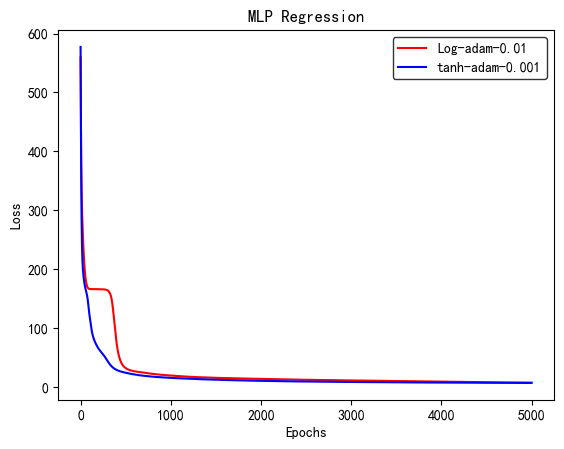

In [6]:
#plt.plot(range(len(MLP1.loss_curve_)),MLP1.loss_curve_,'r',label='Log-adam-0.01')
#plt.plot(range(len(LR6_estimator.loss_curve_)),LR6_estimator.loss_curve_,'g',label='Log-lbfgs-0.01')#优化器为lbfgs时没有loss曲线
plt.plot(range(len(MLP3.loss_curve_)),MLP3.loss_curve_,'b',label='tanh-adam-0.01')
#plt.plot(range(len(LR8_estimator.loss_curve_)),LR8_estimator.loss_curve_,'y',label='tanh-lbfgs-0.01')
plt.legend(loc='best',edgecolor='black')
plt.title('MLP Regression')
plt.xlabel('Iterations') # x 轴
plt.ylabel('Loss') # y轴

In [10]:
#确定参数最大迭代次数

dict2={'epochs':[],'activations':[],'solver':[],'learningrate':[],'hidden_layer_sizes':[]}
data2=[]
for i2 in range(1000,5000,100):
#            for i3 in hidden_layer_sizes:
                dict2={'max_iters':i2,'activations':'tanh','solver':'adam','learningrate':0.01,'hidden_layer_sizes':'(200,200,)'}
                LR_estimator= MLPRegressor(activation='tanh',
                         solver='adam',hidden_layer_sizes=(200,200,),
                         learning_rate_init=0.01,max_iter=i2, random_state=55)#,batch_size=20)
                LR_estimator.fit(x_train,y_train)
                pred_1 =LR_estimator.predict(x_train)
                dict2['R2']=r2_score(y_train,pred_1)
                #plt.plot(range(len(max_iter)),r2_score(y_train,pred_1),'bo-',label='R2') 
                dict2['Loss']= LR_estimator.best_loss_#求取每个模型的最小loss值#mean_squared_error(pred_1, y_test)
                dict2['MAE']= mean_absolute_error(pred_1, y_train)
                data2.append(dict2)
data2=pd.DataFrame(data2)
data2.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\epochs.xlsx',sheet_name='迭代次数')  #存储下列表
data2#.sort_values(by='R2')#,ascending=False)


,max_iters,activations,solver,learningrate,hidden_layer_sizes,R2,Loss,MAE
0,1000,tanh,adam,0.01,"(200,200,)",0.916852,18.838984,3.427443
1,1100,tanh,adam,0.01,"(200,200,)",0.919325,18.276988,3.301243
2,1200,tanh,adam,0.01,"(200,200,)",0.921085,17.877553,3.211140
3,1300,tanh,adam,0.01,"(200,200,)",0.925603,16.866655,3.045666
4,1400,tanh,adam,0.01,"(200,200,)",0.931829,15.453863,2.860655
5,1500,tanh,adam,0.01,"(200,200,)",0.936882,14.285939,2.708034
6,1600,tanh,adam,0.01,"(200,200,)",0.941263,13.310118,2.532519
7,1700,tanh,adam,0.01,"(200,200,)",0.944763,12.514361,2.389896
8,1800,tanh,adam,0.01,"(200,200,)",0.947478,11.903284,2.286796
9,1900,tanh,adam,0.01,"(200,200,)",0.949654,11.406010,2.235231


0.955493566286929
mae_score 1.997535067598098
mse_score 20.159063489771228


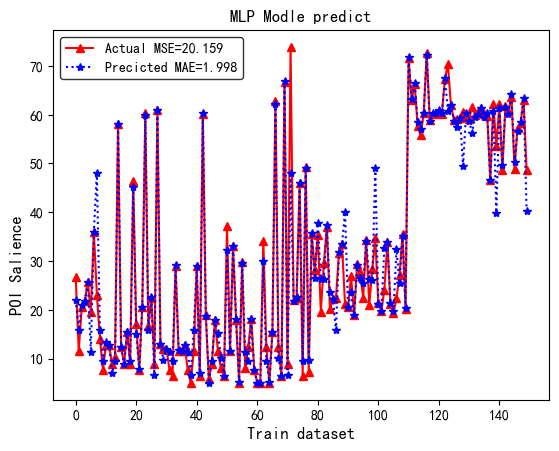

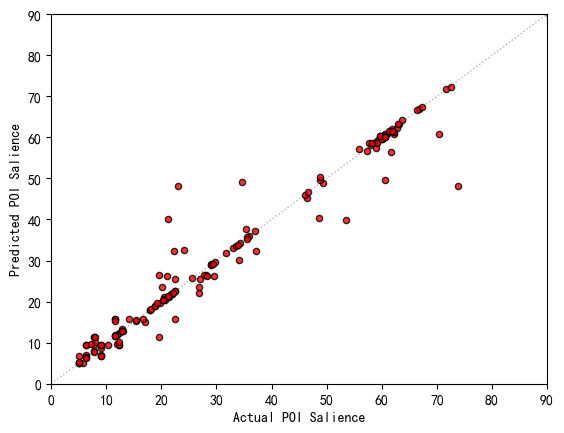

In [4]:
#确定模型结构训练集上的效果，即绘制训练过程。
MLP= MLPRegressor(activation='tanh',
                         solver='adam',hidden_layer_sizes=(200,200,),
                         learning_rate_init=0.01,max_iter=2300, random_state=55)
MLP = MLP.fit(x_train,y_train)
pred_i =MLP.predict(x_train)
print(r2_score(y_train,pred_i)) 

mae = mean_absolute_error(pred_i, y_train)
mse = mean_squared_error(pred_i, y_train)
print('mae_score',mae)
print('mse_score',mse)
plt.plot(range(len(y_train)),y_train,'r^-',label='Actual MSE=%.3f'%mse) 
plt.plot(range(len(y_train)),pred_i,'b*',ls = 'dotted',label='Precicted MAE=%.3f'%mae) 
plt.legend(loc='best',edgecolor='black')
plt.title('MLP Modle predict')
plt.xlabel('Train dataset',fontsize='large') # x 轴
plt.ylabel('POI Salience',fontsize='large',horizontalalignment='right') # y轴
scatter_plot(y_train,pred_i,r2_score(y_train,pred_i))

0.7254760340654065
mae_score 7.134531611426877
mse_score 106.94193263474567


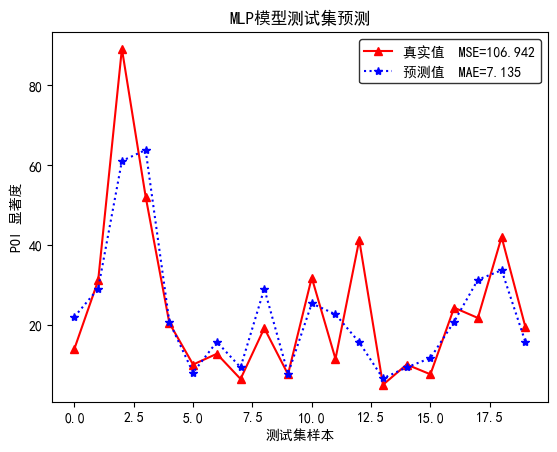

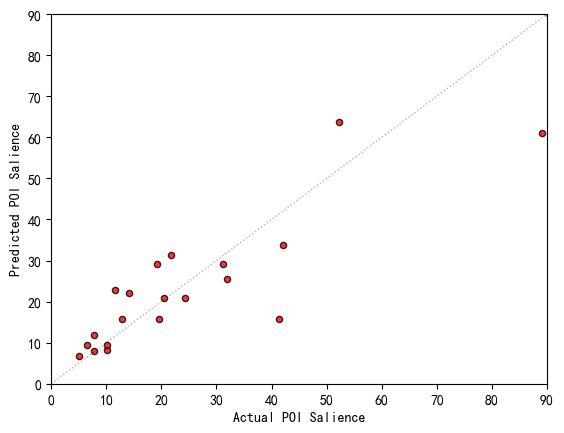

In [6]:
#预测测试集
#确定模型结构训练集上的效果，即绘制训练过程。
# MLP1= MLPRegressor(activation='tanh',
#                          solver='sgd',hidden_layer_sizes=(35,35,),
#                          learning_rate_init=0.0001,
#                            max_iter=23400, random_state=55)
#MLP= MLP.fit(x_train,y_train)
#print(x_test)
#print(y_test)
pred_j =MLP.predict(x_test)
#print(pred_j)
print(r2_score(y_test,pred_j)) 
mae1 = mean_absolute_error(pred_j, y_test)
mse1 = mean_squared_error(pred_j, y_test)
print('mae_score',mae1)
print('mse_score',mse1)
plt.plot(range(len(y_test)),y_test,'r^-',label='真实值  MSE=%.3f'%mse1) 
plt.plot(range(len(y_test)),pred_j,'b*',ls = 'dotted',label='预测值  MAE=%.3f'%mae1) 
plt.legend(loc='best',edgecolor='black')
plt.title('MLP模型测试集预测')

plt.xlabel('测试集样本') # x 轴
plt.ylabel('POI 显著度') # y轴
scatter_plot(y_test,pred_j,r2_score(y_test,pred_j))

data=[]
data=list(zip(*np.array([y_test,pred_j])))
data=pd.DataFrame(data)
data.to_excel(r'D:\cat\科研\期刊论文\初稿\MLP方法\Dataset\MLPModel\data\Predict_test.xlsx',sheet_name='测试数据集')  #存储下列表

